In [1]:
from keras import datasets
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [2]:
X_train = X_train.reshape(-1,32,32,3)
X_test = X_test.reshape(-1,32,32,3)

In [3]:
import tensorflow as tf
from keras.utils import to_categorical

# Convert label to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [4]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers import BatchNormalization

#Creating CNN model
"""
  [[Conv2D->relu]*2 -> BatchNormalization -> MaxPool2D -> Dropout]*2 -> 
  [Conv2D->relu]*2 -> BatchNormalization -> Dropout -> 
  Flatten -> Dense -> BatchNormalization -> Dropout -> Out
"""
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (32,32,3)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

In [6]:
from keras.optimizers import RMSprop

# Define Optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [7]:
# Compile model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [8]:
from keras.callbacks import ReduceLROnPlateau

# Audjusting learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [9]:
#Adjusting epochs and batch_size
epochs = 60
batch_size = 128

In [10]:
from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation 
datagen = ImageDataGenerator(
        featurewise_center=False, # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [11]:
#Prediction model
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/60
351/351 - 463s - loss: 1.6559 - accuracy: 0.4341 - val_loss: 2.0728 - val_accuracy: 0.3136 - lr: 0.0010
Epoch 2/60
351/351 - 464s - loss: 1.1392 - accuracy: 0.5980 - val_loss: 1.3692 - val_accuracy: 0.5842 - lr: 0.0010
Epoch 3/60
351/351 - 561s - loss: 0.9570 - accuracy: 0.6636 - val_loss: 1.1191 - val_accuracy: 0.6178 - lr: 0.0010
Epoch 4/60
351/351 - 598s - loss: 0.8522 - accuracy: 0.7016 - val_loss: 0.8948 - val_accuracy: 0.6910 - lr: 0.0010
Epoch 5/60
351/351 - 569s - loss: 0.7827 - accuracy: 0.7261 - val_loss: 0.9523 - val_accuracy: 0.6928 - lr: 0.0010
Epoch 6/60
351/351 - 573s - loss: 0.7350 - accuracy: 0.7410 - val_loss: 0.8791 - val_accuracy: 0.7130 - lr: 0.0010
Epoch 7/60
351/351 - 577s - loss: 0.6930 - accuracy: 0.7556 - val_loss: 0.7760 - val_accuracy: 0.7430 - lr: 0.0010
Epoch 8/60
351/351 - 545s - loss: 0.6514 - accuracy: 0.7705 - val_loss: 1.2617 - val_accuracy: 0.6432 - lr: 0.0010
Epoch 9/60
351/351 - 457s - loss: 0.6242 - accuracy: 0.7828 - val_loss: 0.7605 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


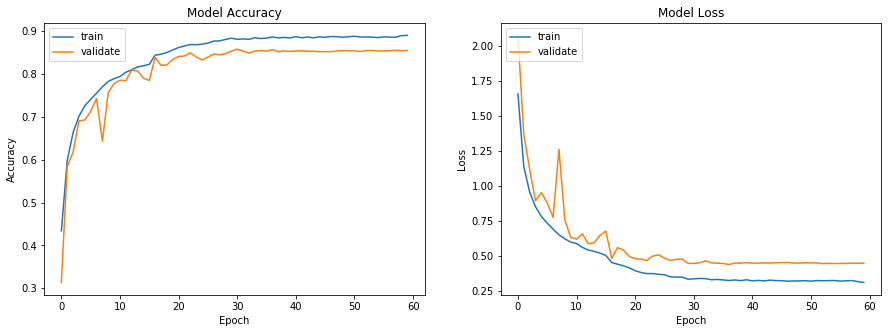

In [19]:
import matplotlib.pyplot as plt

def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)
plt.show()

In [14]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(X_test)

313/313 [==============================] - 25s 81ms/step - loss: 0.4665 - accuracy: 0.8532
Test loss: 0.46648865938186646
Test accuracy: 0.8532000184059143


In [15]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

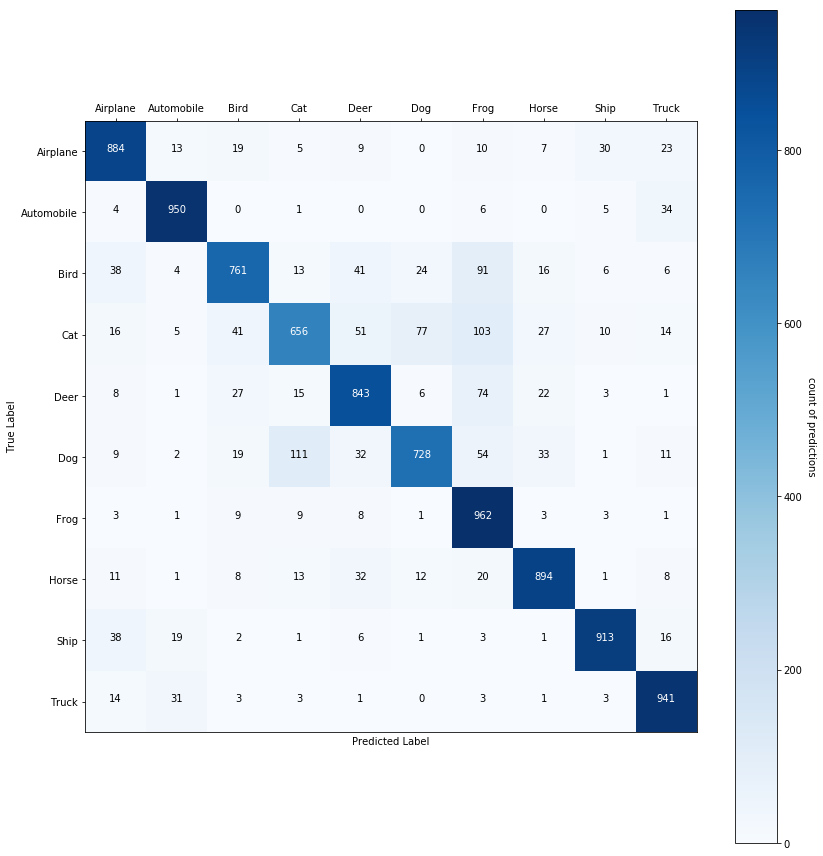

In [16]:
from sklearn.metrics import confusion_matrix

import numpy as np

labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = pred[errors]
y_true_errors = y_true[errors]
X_test_errors = X_test[errors]

cm = confusion_matrix(y_true, y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [17]:
import os

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /Users/patrickfahy99/Kaggle_Competitions/saved_models/keras_cifar10_trained_model.h5 
313/313 [==============================] - 25s 81ms/step - loss: 0.4665 - accuracy: 0.8532
Test loss: 0.46648865938186646
Test accuracy: 0.8532000184059143


*** Don't need the cells below ***

In [69]:
# select the index with the maximum probability
results = np.argmax(pred,axis = 1)

In [70]:
onehot_encoded = list()
for value in results:
    letter = [0 for _ in range(10)]
    letter[value] = 1
    onehot_encoded.append(letter)
results = onehot_encoded

In [71]:
num = 0.0
for y,x in zip(y_test, results):
    if not all(y == x):
        num += 1
accuracy = 1 - num / 10000
print(100 * float(accuracy), '% accurate')

85.32 % accurate
